In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import make_blobs

In [3]:
data=make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.8, random_state=101)

data = (x, y)

Where:

data[0] → x (features)

data[1] → y (cluster labels)



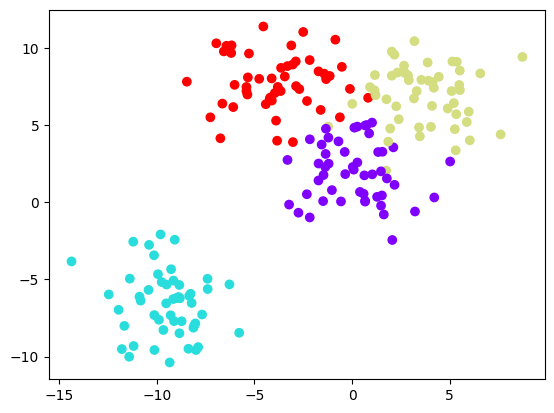

In [6]:
plt.scatter(data[0][:, 0], data[0][:, 1], c=data[1], cmap='rainbow')

In [8]:
from sklearn.cluster import KMeans

For using KMeans and predicting clusters we need to know how many clusters are there

In [9]:
kmeans=KMeans(n_clusters=4)

Fitting our model to data[0] which is our features of data

In [10]:
kmeans.fit(data[0])

KMeans(n_clusters=4)

Checking centroids of clusters

In [11]:
kmeans.cluster_centers_

array([[ 3.66465568,  6.97762652],
       [-9.46941837, -6.56081545],
       [-0.03183854,  2.07689723],
       [-4.13591321,  7.95389851]])

It gives predicted labels of Kmeans model

In [13]:
kmeans.labels_

array([3, 0, 2, 0, 0, 1, 0, 2, 0, 2, 3, 2, 0, 0, 3, 2, 0, 2, 1, 3, 1, 2,
       2, 1, 3, 1, 1, 2, 0, 0, 3, 1, 0, 2, 2, 3, 1, 1, 1, 2, 1, 3, 3, 3,
       2, 0, 3, 2, 1, 2, 2, 3, 0, 2, 1, 3, 2, 2, 3, 0, 1, 0, 1, 3, 0, 2,
       1, 0, 0, 1, 0, 2, 1, 2, 1, 0, 0, 2, 3, 2, 2, 1, 0, 1, 2, 2, 2, 3,
       2, 1, 1, 1, 1, 2, 2, 1, 0, 3, 1, 0, 2, 1, 2, 2, 0, 2, 1, 0, 1, 1,
       0, 3, 3, 0, 1, 0, 3, 3, 0, 3, 0, 3, 2, 3, 2, 0, 3, 2, 1, 3, 3, 3,
       2, 1, 1, 3, 0, 3, 0, 2, 1, 0, 1, 3, 3, 0, 2, 1, 3, 3, 3, 3, 2, 0,
       2, 3, 0, 0, 0, 2, 0, 2, 2, 3, 1, 3, 2, 0, 3, 2, 0, 2, 3, 0, 2, 3,
       0, 0, 1, 0, 3, 1, 1, 3, 1, 1, 1, 1, 1, 2, 1, 0, 0, 3, 1, 2, 0, 0,
       1, 2], dtype=int32)

Now we can compare our predicted labels and actual labels by visualizing it

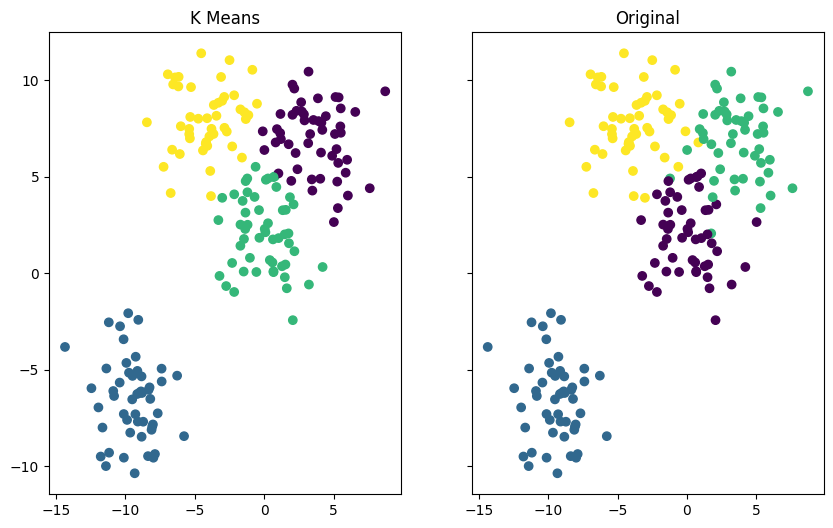

In [15]:
fig, (ax1,ax2)=plt.subplots(1,2, sharey=True, figsize=(10,6))

ax1.set_title('K Means')
ax1.scatter(data[0][:, 0], data[0][:, 1], c=kmeans.labels_)

ax2.set_title('Original')
ax2.scatter(data[0][:, 0], data[0][:, 1], c=data[1])

In [18]:
cd=pd.read_csv('/content/College_Data.csv', index_col=0)
cd.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


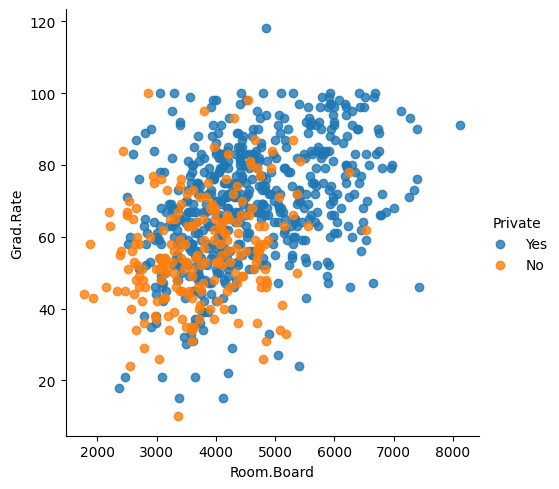

In [22]:
sns.lmplot(x='Room.Board', y='Grad.Rate', data=cd, hue="Private", fit_reg=False)

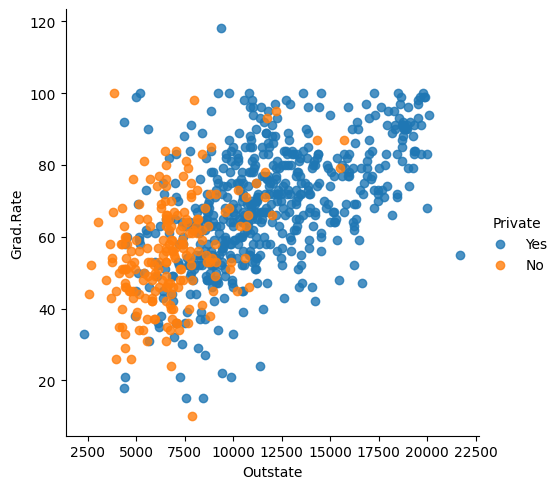

In [23]:
sns.lmplot(x='Outstate', y='Grad.Rate', data=cd, hue="Private", fit_reg=False)

In [25]:
cd[cd['Grad.Rate']>100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


In [26]:
cd['Grad.Rate']['Cazenovia College']=100

/tmp/ipython-input-2070198765.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cd['Grad.Rate']['Cazenovia College']=100
/tmp/ipython-input-2070198765.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

In [28]:
cd[cd['Grad.Rate']>100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate


In [29]:
from sklearn.cluster import KMeans

In [30]:
km=KMeans(n_clusters=2)

In [32]:
km.fit(cd.drop('Private', axis=1))

KMeans(n_clusters=2)

In [34]:
km.cluster_centers_

array([[1.81323468e+03, 1.28716592e+03, 4.91044843e+02, 2.53094170e+01,
        5.34708520e+01, 2.18854858e+03, 5.95458894e+02, 1.03957085e+04,
        4.31136472e+03, 5.41982063e+02, 1.28033632e+03, 7.04424514e+01,
        7.78251121e+01, 1.40997010e+01, 2.31748879e+01, 8.93204634e+03,
        6.50926756e+01],
       [1.03631389e+04, 6.55089815e+03, 2.56972222e+03, 4.14907407e+01,
        7.02037037e+01, 1.30619352e+04, 2.46486111e+03, 1.07191759e+04,
        4.64347222e+03, 5.95212963e+02, 1.71420370e+03, 8.63981481e+01,
        9.13333333e+01, 1.40277778e+01, 2.00740741e+01, 1.41705000e+04,
        6.75925926e+01]])

In [35]:
km.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [37]:
cd.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [38]:
dict={"Yes":1, "No":0}
cd["Private_p"]=cd["Private"].map(dict)

In [40]:
cd

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Private_p
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40,0
Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83,1
Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49,1
Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99,1


In [ ]:
cd=cd.drop('Private', axis=1)

In [43]:
cd

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Private_p
Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Worcester State College,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40,0
Xavier University,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83,1
Xavier University of Louisiana,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49,1
Yale University,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99,1


In [44]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(cd['Private_p'], km.labels_))
print(confusion_matrix(cd['Private_p'], km.labels_))

              precision    recall  f1-score   support

           0       0.21      0.65      0.31       212
           1       0.31      0.06      0.10       565

    accuracy                           0.22       777
   macro avg       0.26      0.36      0.21       777
weighted avg       0.29      0.22      0.16       777

[[138  74]
 [531  34]]


Interpretation:

Range: -1 to +1

+1 → well-separated clusters

0 → overlapping clusters

-1 → wrong assignment

Rule of thumb:

0.5 → good

0.2–0.5 → acceptable

< 0.2 → weak clustering

This tells you whether clusters make sense geometrically.

In clustering, correctness is evaluated using internal metrics like silhouette score, stability analysis, and domain interpretability, since no ground truth labels exist.

In [46]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

silhouette_score(cd.drop('Private_p', axis=1), km.labels_)

np.float64(0.5599267973651544)

In [47]:
davies_bouldin_score(cd.drop('Private_p', axis=1), km.labels_)

np.float64(1.1333615659937541)